<a href="https://colab.research.google.com/github/jagrutsharma/hack-2022/blob/main/Hackathon_2022_Handwritten_Digits_Prediction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Digits from Handwritten Images - Using Convolutional Neural Network


# Step 1: Train the model using MNIST dataset

In [79]:
# This has been done (if needed, we can go in details)

# Step 2: Separate some data to test

In [80]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset. Set aside some data for testing.
(x_train, y_train), (x_test, y_test)  = mnist.load_data()
# Display the number of samples in x_test, y_test
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)) + "\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


# Step 3: Prepare the test **samples**

In [81]:
# Get number of rows
img_rows = x_train[0].shape[0]
# Get number of columns
img_cols = x_train[0].shape[1]

# Getting data in the right 'shape' needed for Keras
# Add a 4th dimenion to the data thereby changing the
# original image shape of (60000,28,28) to (60000,28,28,1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# change image type to float32 data type
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_test /= 255.0

# Print number of test samples
print(x_test.shape[0], 'test samples')

10000 test samples


# Step 4: Load the trained model

In [82]:
# Load the trained model
from tensorflow.keras.models import load_model
TRAINED_MODEL_NAME = 'mnist_trained_model.h5'
classifier = load_model(TRAINED_MODEL_NAME)

# Step 5: Predict handwritten digits

9		7		6		3		9		5		8		0		8		

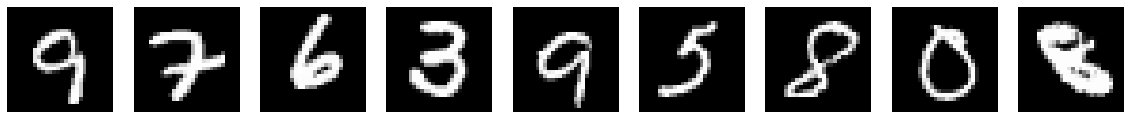

In [84]:
# Test
import numpy as np
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20,20))
SAMPLES_TO_TEST = 9;

# https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict
for i in range(SAMPLES_TO_TEST):
    figure.add_subplot(1,SAMPLES_TO_TEST,i+1)
    random_idx = np.random.randint(0,len(x_test))
    plt.imshow(x_test[random_idx,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(classifier.predict(x_test[random_idx].reshape(1,28,28,1), verbose=0),axis=1),axis=0),end="\t\t")